In [9]:

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import time
from texttable import Texttable
import latextable


#our implementation
import PCA_KPCA as PCA_K

#sklearn implementation
from sklearn import decomposition

#data
from sklearn import datasets


np.random.seed(40)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
#number of sample to generate
n = 1000

X_moon, y_moon = datasets.make_moons(n_samples=n, noise=.05)
X_circles, y_circles = datasets.make_circles(n_samples = n, noise = .05, factor=.5)
X_classes, y_classes = datasets.make_classification(n_samples=n, n_features=20)
X_swiss, y_swiss = datasets.make_swiss_roll(n_samples=n, noise = .03)
X_iris, y_iris = datasets.load_iris().data, datasets.load_iris().target

datasets_names = {'moon': X_moon, 'circles': X_circles, 'classes': X_classes, 'swiss': X_swiss, 'iris': X_iris}
datasets_labels = {'moon': y_moon, 'circles': y_circles, 'classes': y_classes, 'swiss': y_swiss, 'iris': y_iris}

print("data name", "X shape", "y shape", "number of classes", sep=" | ")
for i, j in datasets_names.items():
    print(i, j.shape, datasets_labels[i].shape, len(set(datasets_labels[i])), sep=" | ")

data name | X shape | y shape | number of classes
moon | (1000, 2) | (1000,) | 2
circles | (1000, 2) | (1000,) | 2
classes | (1000, 20) | (1000,) | 2
swiss | (1000, 3) | (1000,) | 1000
iris | (150, 4) | (150,) | 3


In [11]:
rows = [
        ["Datasets", "X shape", "y shape", 'number of classes'],
        ]

for i, j in datasets_names.items():
    row = [i, j.shape, datasets_labels[i].shape, len(set(datasets_labels[i]))]
    rows.append(row)

table = Texttable(max_width=0)
table.set_cols_align(["c"] * len(rows[0]))
table.set_deco(Texttable.HEADER | Texttable.VLINES) #| Texttable.HLINES)
# table.set_cols_dtype(["t"]*len(rows[0]))

table.add_rows(rows=rows)
print(table.draw())

Datasets |  X shape   | y shape | number of classes
=========+============+=========+==================
  moon   | (1000, 2)  | (1000,) |         2        
circles  | (1000, 2)  | (1000,) |         2        
classes  | (1000, 20) | (1000,) |         2        
 swiss   | (1000, 3)  | (1000,) |       1000       
  iris   |  (150, 4)  | (150,)  |         3        


In [12]:
print(latextable.draw_latex(table, caption="Used Datasets Characteristics."))

\begin{table}
	\begin{center}
		\begin{tabular}{c|c|c|c}
			Datasets & X shape & y shape & number of classes \\
			\hline
			moon & (1000, 2) & (1000,) & 2 \\
			circles & (1000, 2) & (1000,) & 2 \\
			classes & (1000, 20) & (1000,) & 2 \\
			swiss & (1000, 3) & (1000,) & 1000 \\
			iris & (150, 4) & (150,) & 3 \\
		\end{tabular}
	\end{center}
	\caption{Used Datasets Characteristics.}
\end{table}


In [17]:
kernels  = ['linear', 'rbf', 'sigmoid', 'polynomial', 'cosine', 'laplacian']
#r is the number of PCs to keep for every dataset
results = {
    'moon': {'r': 1, 'PCA': {'execution_time':None, 'transformed_data':None, 'explained_var':None}, 'SPCA':{'transformed_data':None}, 'KPCA': {'execution_time':list(), 'transformed_data':list(), 'explained_var': list()}, 'SKPCA':{'transformed_data':list()}}, 
    'circles': {'r': 1, 'PCA': {'execution_time':None, 'transformed_data':None, 'explained_var':None}, 'SPCA':{'transformed_data':None}, 'KPCA': {'execution_time': list(), 'transformed_data':list(), 'explained_var': list()}, 'SKPCA':{'transformed_data':list()}}, 
    'classes': {'r': 2, 'PCA': {'execution_time':None, 'transformed_data':None, 'explained_var':None}, 'SPCA':{'transformed_data':None}, 'KPCA': {'execution_time': list(), 'transformed_data':list(), 'explained_var': list()}, 'SKPCA':{'transformed_data':list()}},
    'swiss': {'r': 2, 'PCA': {'execution_time':None, 'transformed_data':None, 'explained_var':None}, 'SPCA':{'transformed_data':None}, 'KPCA': {'execution_time': list(), 'transformed_data':list(), 'explained_var': list()}, 'SKPCA':{'transformed_data':list()}},
    'iris': {'r': 2, 'PCA': {'execution_time':None, 'transformed_data':None, 'explained_var':None}, 'SPCA':{'transformed_data':None}, 'KPCA': {'execution_time': list(), 'transformed_data':list(), 'explained_var': list()}, 'SKPCA':{'transformed_data':list()}},
    }

for data in results.keys():
    r = results[data]['r']
    for kernel in kernels:
        #using our implementation of KPCA with gamma=1, c=0, and degree=3
        start = time.time()
        transformed_data, explained_var = PCA_K.kpca(X=datasets_names[data], r=r, kernel=kernel, transform=True, par1=None, par2=None)
        results[data]['KPCA']['transformed_data'].append(transformed_data)
        end = time.time()-start
        results[data]['KPCA']['execution_time'].append(end)
        results[data]['KPCA']['explained_var'].append(explained_var)
        
        #using sklearn implementation of KPCA
        results[data]['SKPCA']['transformed_data'].append(decomposition.KernelPCA(n_components=r, kernel=kernel, gamma=0.008, coef0=0, degree=4).fit_transform(datasets_names[data]))
        
    #using our implementation of PCA
    start = time.time()
    results[data]['PCA']['transformed_data'], results[data]['PCA']['explained_var'] = PCA_K.pca(X=datasets_names[data], r=r, project=True)
    end = time.time()-start
    results[data]['PCA']['execution_time'] = end
    
    #using sklearn implementation of PCA
    results[data]['SPCA']['transformed_data'] = decomposition.PCA(n_components=r).fit_transform(datasets_names[data])
    

c:\Users\smaza\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, 'Iris')

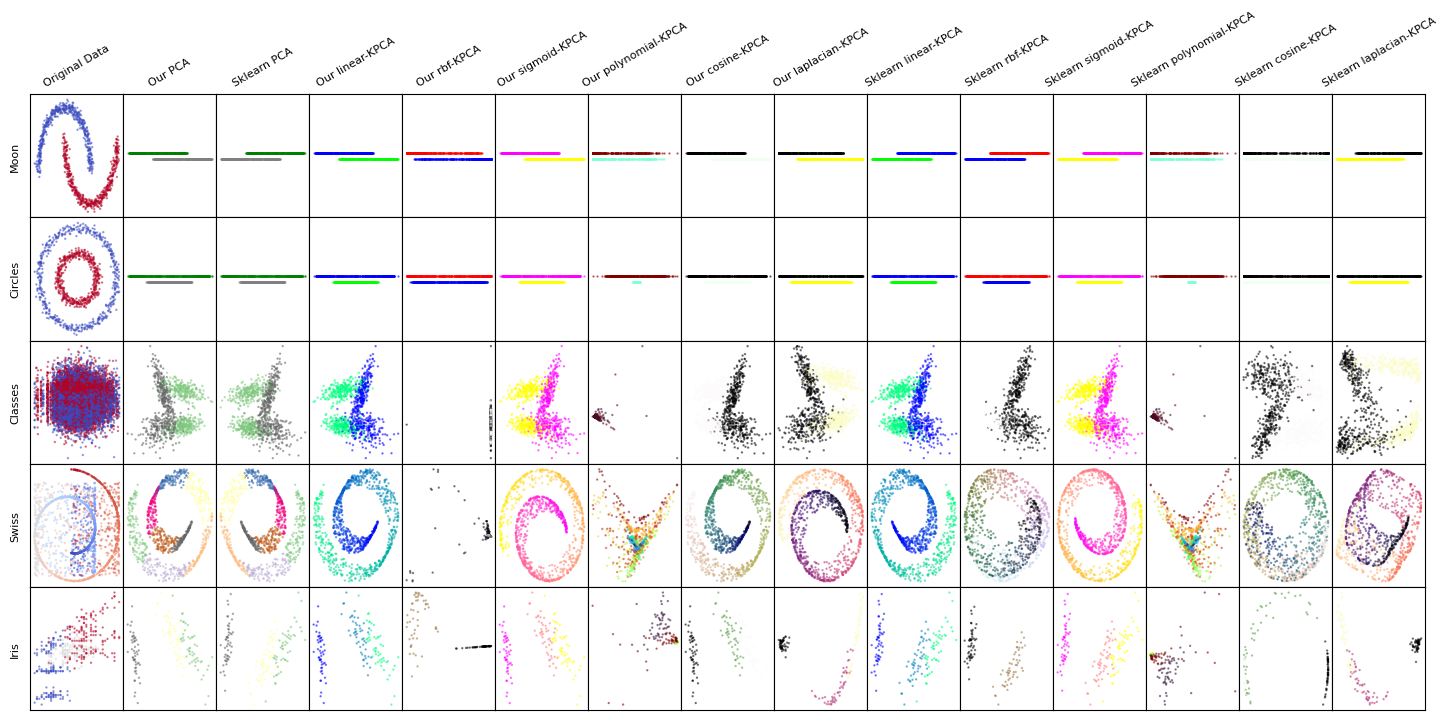

In [18]:
org_color = 'coolwarm'
pca_color_1 = 'green'
pca_color_2 = 'gray'
pca_color_3 = 'Accent_r'
kernels_colors = ['winter', 'cubehelix', 'spring', 'turbo', 'gist_earth', 'magma']
kernels_colors_fixed = [['blue', 'lime'], ['red', 'blue'], ['fuchsia', 'yellow'], ['maroon', 'aquamarine'], ['black', 'honeydew'], ['black', 'yellow']]

fig, ax = plt.subplots(nrows=5, ncols=15, figsize=(18,8), gridspec_kw=dict(hspace=0, wspace=0),
                       subplot_kw={'xticks':[], 'yticks':[]})

#plot original data
ax[0, 0].scatter(datasets_names['moon'][:, 0], datasets_names['moon'][:, 1], c = datasets_labels['moon'], s = 0.5, alpha=0.5, cmap = org_color)
ax[1, 0].scatter(datasets_names['circles'][:, 0], datasets_names['circles'][:, 1], c = datasets_labels['circles'], s = 0.5, alpha=0.5, cmap = org_color)
for i in range(1, datasets_names['classes'].shape[1]):
    ax[2, 0].scatter(datasets_names['classes'][:, 0], datasets_names['classes'][:, i], c = datasets_labels['classes'], s = 0.5, alpha=0.5, cmap = org_color)
for i in range(1, datasets_names['swiss'].shape[1]):
    ax[3, 0].scatter(datasets_names['swiss'][:, 0], datasets_names['swiss'][:, i], c = datasets_labels['swiss'], s = 0.5, alpha=0.5, cmap = org_color)
for i in range(1, datasets_names['iris'].shape[1]):
    ax[4, 0].scatter(datasets_names['iris'][:, 0], datasets_names['iris'][:, i], c = datasets_labels['iris'], s = 0.5, alpha=0.5, cmap = org_color)

#plot PCA from our implementation
ax[0,1].scatter(results['moon']['PCA']['transformed_data'][datasets_labels['moon']==0, 0], results['moon']['PCA']['transformed_data'][datasets_labels['moon']==0, 0]*0+0.02, s=0.5, color=pca_color_1, alpha=0.5)
ax[0,1].scatter(results['moon']['PCA']['transformed_data'][datasets_labels['moon']==1, 0], results['moon']['PCA']['transformed_data'][datasets_labels['moon']==1, 0]*0-0.02, s=0.5, color=pca_color_2, alpha=0.5)
ax[0,1].set_ylim([-0.4,0.4])

ax[1,1].scatter(results['circles']['PCA']['transformed_data'][datasets_labels['circles']==0, 0], results['circles']['PCA']['transformed_data'][datasets_labels['circles']==0, 0]*0+0.02, s=0.5, color=pca_color_1, alpha=0.5)
ax[1,1].scatter(results['circles']['PCA']['transformed_data'][datasets_labels['circles']==1, 0], results['circles']['PCA']['transformed_data'][datasets_labels['circles']==1, 0]*0-0.02, s=0.5, color=pca_color_2, alpha=0.5)
ax[1,1].set_ylim([-0.4,0.4])

ax[2, 1].scatter(results['classes']['PCA']['transformed_data'][:,0], results['classes']['PCA']['transformed_data'][:,1], c = datasets_labels['classes'], s = 0.5, alpha=0.5, cmap = pca_color_3)
ax[3, 1].scatter(results['swiss']['PCA']['transformed_data'][:,0], results['swiss']['PCA']['transformed_data'][:,1], c = datasets_labels['swiss'], s = 0.5, alpha=0.5, cmap = pca_color_3)
ax[4, 1].scatter(results['iris']['PCA']['transformed_data'][:,0], results['iris']['PCA']['transformed_data'][:,1], c = datasets_labels['iris'], s = 0.5, alpha=0.5, cmap = pca_color_3)

# plot PCA from sklearn implementation
ax[0,2].scatter(results['moon']['SPCA']['transformed_data'][datasets_labels['moon']==0, 0], results['moon']['SPCA']['transformed_data'][datasets_labels['moon']==0, 0]*0+0.02, s=0.5, color=pca_color_1, alpha=0.5)
ax[0,2].scatter(results['moon']['SPCA']['transformed_data'][datasets_labels['moon']==1, 0], results['moon']['SPCA']['transformed_data'][datasets_labels['moon']==1, 0]*0-0.02, s=0.5, color=pca_color_2, alpha=0.5)
ax[0,2].set_ylim([-0.4,0.4])

ax[1,2].scatter(results['circles']['SPCA']['transformed_data'][datasets_labels['circles']==0, 0], results['circles']['SPCA']['transformed_data'][datasets_labels['circles']==0, 0]*0+0.02, s=0.5, color=pca_color_1, alpha=0.5)
ax[1,2].scatter(results['circles']['SPCA']['transformed_data'][datasets_labels['circles']==1, 0], results['circles']['SPCA']['transformed_data'][datasets_labels['circles']==1, 0]*0-0.02, s=0.5, color=pca_color_2, alpha=0.5)
ax[1,2].set_ylim([-0.4,0.4])

ax[2, 2].scatter(results['classes']['SPCA']['transformed_data'][:,0], results['classes']['SPCA']['transformed_data'][:,1], c = datasets_labels['classes'], s = 0.5, alpha=0.5, cmap = pca_color_3)
ax[3, 2].scatter(results['swiss']['SPCA']['transformed_data'][:,0], results['swiss']['PCA']['transformed_data'][:,1], c = datasets_labels['swiss'], s = 0.5, alpha=0.5, cmap = pca_color_3)
ax[4, 2].scatter(results['iris']['SPCA']['transformed_data'][:,0], results['iris']['SPCA']['transformed_data'][:,1], c = datasets_labels['iris'], s = 0.5, alpha=0.5, cmap = pca_color_3)

# plot KPCA with different kernels from our implementation
row=0
for data in datasets_names.keys():
    for i in range(len(kernels)):
        if results[data]['r']==1:
            ax[row,i+3].scatter(results[data]['KPCA']['transformed_data'][i][datasets_labels[data]==0, 0], results[data]['KPCA']['transformed_data'][i][datasets_labels[data]==0, 0]*0+0.02, s=0.5, color=kernels_colors_fixed[i][0], alpha=0.5)
            ax[row,i+3].scatter(results[data]['KPCA']['transformed_data'][i][datasets_labels[data]==1, 0], results[data]['KPCA']['transformed_data'][i][datasets_labels[data]==1, 0]*0-0.02, s=0.5, color=kernels_colors_fixed[i][1], alpha=0.5)
            ax[row,i+3].set_ylim([-0.4,0.4])
        else:
            ax[row,i+3].scatter(results[data]['KPCA']['transformed_data'][i][:,0], results[data]['KPCA']['transformed_data'][i][:,1], c = datasets_labels[data], s = 0.5, alpha=0.5, cmap = kernels_colors[i])
    row+=1

# plot KPCA with different kernels from sklearn implementation
row=0
for data in datasets_names.keys():
    for i in range(len(kernels)):
        if results[data]['r']==1:
            ax[row,i+9].scatter(results[data]['SKPCA']['transformed_data'][i][datasets_labels[data]==0, 0], results[data]['SKPCA']['transformed_data'][i][datasets_labels[data]==0, 0]*0+0.02, s=0.5, color=kernels_colors_fixed[i][0], alpha=0.5)
            ax[row,i+9].scatter(results[data]['SKPCA']['transformed_data'][i][datasets_labels[data]==1, 0], results[data]['SKPCA']['transformed_data'][i][datasets_labels[data]==1, 0]*0-0.02, s=0.5, color=kernels_colors_fixed[i][1], alpha=0.5)
            ax[row,i+9].set_ylim([-0.4,0.4])
        else:
            ax[row,i+9].scatter(results[data]['SKPCA']['transformed_data'][i][:,0], results[data]['SKPCA']['transformed_data'][i][:,1], c = datasets_labels[data], s = 0.5, alpha=0.5, cmap = kernels_colors[i])
    row+=1

#set titles
ax[0,0].set_title('Original Data', fontsize=8, rotation=30)
ax[0,1].set_title('Our PCA', fontsize=8, rotation=30)
ax[0,2].set_title('Sklearn PCA', fontsize=8, rotation=30)
ax[0,3].set_title('Our linear-KPCA', fontsize=8, rotation=30)
ax[0,4].set_title('Our rbf-KPCA', fontsize=8, rotation=30)
ax[0,5].set_title('Our sigmoid-KPCA', fontsize=8, rotation=30)
ax[0,6].set_title('Our polynomial-KPCA', fontsize=8, rotation=30)
ax[0,7].set_title('Our cosine-KPCA', fontsize=8, rotation=30)
ax[0,8].set_title('Our laplacian-KPCA', fontsize=8, rotation=30)

ax[0,9].set_title('Sklearn linear-KPCA', fontsize=8, rotation=30)
ax[0,10].set_title('Sklearn rbf-KPCA', fontsize=8, rotation=30)
ax[0,11].set_title('Sklearn sigmoid-KPCA', fontsize=8, rotation=30)
ax[0,12].set_title('Sklearn polynomial-KPCA', fontsize=8, rotation=30)
ax[0,13].set_title('Sklearn cosine-KPCA', fontsize=8, rotation=30)
ax[0,14].set_title('Sklearn laplacian-KPCA', fontsize=8, rotation=30)

#set datasets names
ax[0,0].set_ylabel('Moon', fontsize=8, rotation=90)
ax[1,0].set_ylabel('Circles', fontsize=8, rotation=90)
ax[2,0].set_ylabel('Classes', fontsize=8, rotation=90)
ax[3,0].set_ylabel('Swiss', fontsize=8, rotation=90)
ax[4,0].set_ylabel('Iris', fontsize=8, rotation=90)


In [19]:
#A comparison of PCA and defferent PCA kernels execution time

rows = [
        ["Kernels\nDatasets", "PCA", "linear-KPCA", 'rbf-KPCA', 'sigmoid-KPCA', 'polynomial-KPCA', 'cosine-KPCA', 'laplacian-KPCA'],
        ]
for data in datasets_names.keys():
    row = [data]
    row.append(str(round(results[data]['PCA']['execution_time'], 4)))
    for t in results[data]['KPCA']['execution_time']:
        row.append(str(round(t, 4)))
    rows.append(row)

table = Texttable(max_width=0)
table.set_cols_align(["c"] * len(rows[0]))
table.set_deco(Texttable.HEADER | Texttable.VLINES | Texttable.HLINES)
table.set_cols_dtype(["t"]*len(rows[0]))

table.add_rows(rows=rows)
print(table.draw())

Kernels  |  PCA  | linear-KPCA | rbf-KPCA | sigmoid-KPCA | polynomial-KPCA | cosine-KPCA | laplacian-KPCA
Datasets |       |             |          |              |                 |             |               
=========+=======+=============+==========+==============+=================+=============+===============
  moon   |  0.0  |   1.2463    |  1.3939  |    1.1735    |     1.1285      |   1.2636    |     1.1498    
---------+-------+-------------+----------+--------------+-----------------+-------------+---------------
circles  |  0.0  |   1.3288    |  1.324   |    1.2675    |      1.127      |   1.2648    |      1.14     
---------+-------+-------------+----------+--------------+-----------------+-------------+---------------
classes  | 0.003 |   1.2723    |  1.0877  |    1.253     |     1.2772      |    1.363    |     1.2885    
---------+-------+-------------+----------+--------------+-----------------+-------------+---------------
 swiss   |  0.0  |   1.6363    |  1.7689  |   

In [16]:
print(latextable.draw_latex(table, caption="Comparison between PCA and different Kernel PCA execution time (in secs) (r=1)."))

\begin{table}
	\begin{center}
		\begin{tabular}{c|c|c|c|c|c|c|c}
			Kernels
Datasets & PCA & linear-KPCA & rbf-KPCA & sigmoid-KPCA & polynomial-KPCA & cosine-KPCA & laplacian-KPCA \\
			\hline
			moon & 0.0 & 1.2018 & 1.4304 & 1.3026 & 1.1632 & 1.1757 & 1.2 \\
			\hline
			circles & 0.001 & 1.3163 & 1.3504 & 1.2662 & 1.1097 & 1.2751 & 1.1665 \\
			\hline
			classes & 0.002 & 1.3387 & 0.9914 & 1.252 & 1.197 & 1.2801 & 1.3474 \\
			\hline
			swiss & 0.001 & 1.3245 & 1.3779 & 1.0626 & 1.166 & 1.3197 & 1.2198 \\
			\hline
			iris & 0.0 & 0.0474 & 0.0342 & 0.0369 & 0.0386 & 0.0385 & 0.0369 \\
		\end{tabular}
	\end{center}
	\caption{A comparison of PCA and defferent PCA kernels execution time (in sec).}
\end{table}


In [20]:
# #A comparison of PCA and defferent PCA kernels explained variance

# rows = [
#         ["Kernels\nDatasets", "PCA", "linear-KPCA", 'rbf-KPCA', 'sigmoid-KPCA', 'polynomial-KPCA', 'cosine-KPCA', 'laplacian-KPCA'],
#         ]
# for data in datasets_names.keys():
#     row = [data]
#     if data=='moon' or 'circles':
#         row.append(round(results[data]['PCA']['explained_var'][0], 3))
#     else:
#         #when k=2 we have explained variance by every component
#         explained_var1, explained_var2 = round(results[data]['PCA']['explained_var'][0], 3), round(results[data]['PCA']['explained_var'][1], 3)
#         row.append(explained_var1+explained_var2)
        
#     for t in results[data]['KPCA']['explained_var']:
#         row.append(round(t, 3))
#     rows.append(row)

# table = Texttable(max_width=0).set_cols_align(["c", "c", "c", "c", "c", "c", "c", "c"]) 
# table.add_rows(rows=rows)
# print(table.draw())

In [21]:
kernels  = ['linear', 'rbf', 'sigmoid', 'polynomial', 'cosine', 'laplacian']
#r is the number of PCs to keep for every dataset
results = {
    'moon': {'r': 2, 'PCA': {'execution_time':None, 'transformed_data':None, 'explained_var':None}, 'SPCA':{'transformed_data':None}, 'KPCA': {'execution_time':list(), 'transformed_data':list(), 'explained_var': list()}, 'SKPCA':{'transformed_data':list()}}, 
    'circles': {'r': 2, 'PCA': {'execution_time':None, 'transformed_data':None, 'explained_var':None}, 'SPCA':{'transformed_data':None}, 'KPCA': {'execution_time': list(), 'transformed_data':list(), 'explained_var': list()}, 'SKPCA':{'transformed_data':list()}}, 
    'classes': {'r': 2, 'PCA': {'execution_time':None, 'transformed_data':None, 'explained_var':None}, 'SPCA':{'transformed_data':None}, 'KPCA': {'execution_time': list(), 'transformed_data':list(), 'explained_var': list()}, 'SKPCA':{'transformed_data':list()}},
    'swiss': {'r': 2, 'PCA': {'execution_time':None, 'transformed_data':None, 'explained_var':None}, 'SPCA':{'transformed_data':None}, 'KPCA': {'execution_time': list(), 'transformed_data':list(), 'explained_var': list()}, 'SKPCA':{'transformed_data':list()}},
    'iris': {'r': 2, 'PCA': {'execution_time':None, 'transformed_data':None, 'explained_var':None}, 'SPCA':{'transformed_data':None}, 'KPCA': {'execution_time': list(), 'transformed_data':list(), 'explained_var': list()}, 'SKPCA':{'transformed_data':list()}},
    }

for data in results.keys():
    r = results[data]['r']
    for kernel in kernels:
        #using our implementation of KPCA with gamma=1, c=0, and degree=3
        start = time.time()
        transformed_data, explained_var = PCA_K.kpca(X=datasets_names[data], r=r, kernel=kernel, transform=True, par1=None, par2=None)
        results[data]['KPCA']['transformed_data'].append(transformed_data)
        end = time.time()-start
        results[data]['KPCA']['execution_time'].append(end)
        results[data]['KPCA']['explained_var'].append(explained_var)
        
        #using sklearn implementation of KPCA
        results[data]['SKPCA']['transformed_data'].append(decomposition.KernelPCA(n_components=r, kernel=kernel, gamma=0.008, coef0=0, degree=4).fit_transform(datasets_names[data]))
        
    #using our implementation of PCA
    start = time.time()
    results[data]['PCA']['transformed_data'], results[data]['PCA']['explained_var'] = PCA_K.pca(X=datasets_names[data], r=r, project=True)
    end = time.time()-start
    results[data]['PCA']['execution_time'] = end
    
    #using sklearn implementation of PCA
    results[data]['SPCA']['transformed_data'] = decomposition.PCA(n_components=r).fit_transform(datasets_names[data])
    

Text(0, 0.5, 'Iris')

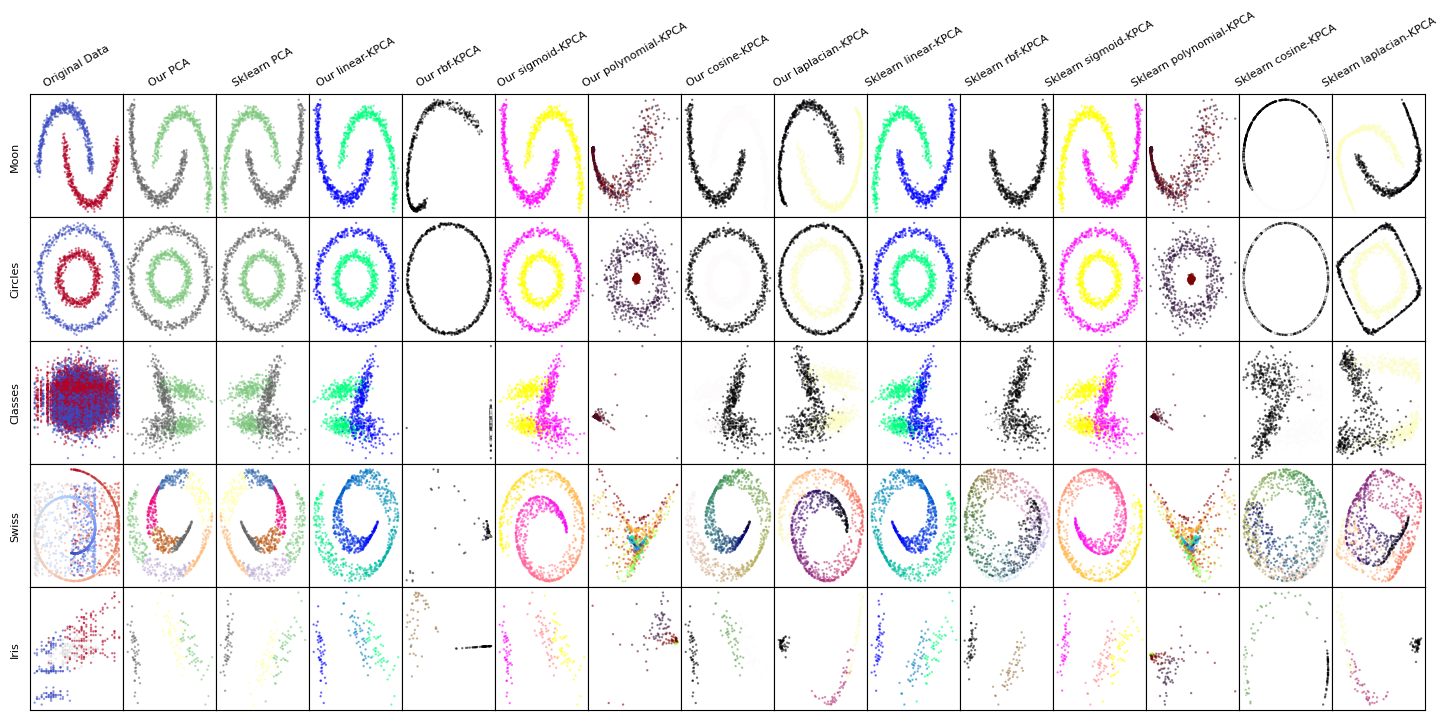

In [23]:
org_color = 'coolwarm'
pca_color_1 = 'green'
pca_color_2 = 'gray'
pca_color_3 = 'Accent_r'
kernels_colors = ['winter', 'cubehelix', 'spring', 'turbo', 'gist_earth', 'magma']
kernels_colors_fixed = [['blue', 'lime'], ['red', 'blue'], ['fuchsia', 'yellow'], ['maroon', 'aquamarine'], ['black', 'honeydew'], ['black', 'yellow']]

fig, ax = plt.subplots(nrows=5, ncols=15, figsize=(18,8), gridspec_kw=dict(hspace=0, wspace=0),
                       subplot_kw={'xticks':[], 'yticks':[]})

#plot original data
ax[0, 0].scatter(datasets_names['moon'][:, 0], datasets_names['moon'][:, 1], c = datasets_labels['moon'], s = 0.5, alpha=0.5, cmap = org_color)
ax[1, 0].scatter(datasets_names['circles'][:, 0], datasets_names['circles'][:, 1], c = datasets_labels['circles'], s = 0.5, alpha=0.5, cmap = org_color)
for i in range(1, datasets_names['classes'].shape[1]):
    ax[2, 0].scatter(datasets_names['classes'][:, 0], datasets_names['classes'][:, i], c = datasets_labels['classes'], s = 0.5, alpha=0.5, cmap = org_color)
for i in range(1, datasets_names['swiss'].shape[1]):
    ax[3, 0].scatter(datasets_names['swiss'][:, 0], datasets_names['swiss'][:, i], c = datasets_labels['swiss'], s = 0.5, alpha=0.5, cmap = org_color)
for i in range(1, datasets_names['iris'].shape[1]):
    ax[4, 0].scatter(datasets_names['iris'][:, 0], datasets_names['iris'][:, i], c = datasets_labels['iris'], s = 0.5, alpha=0.5, cmap = org_color)

#plot PCA from our implementation
ax[0, 1].scatter(results['moon']['PCA']['transformed_data'][:,0], results['moon']['PCA']['transformed_data'][:,1], c = datasets_labels['moon'], s = 0.5, alpha=0.5, cmap = pca_color_3)
ax[1, 1].scatter(results['circles']['PCA']['transformed_data'][:,0], results['circles']['PCA']['transformed_data'][:,1], c = datasets_labels['circles'], s = 0.5, alpha=0.5, cmap = pca_color_3)
ax[2, 1].scatter(results['classes']['PCA']['transformed_data'][:,0], results['classes']['PCA']['transformed_data'][:,1], c = datasets_labels['classes'], s = 0.5, alpha=0.5, cmap = pca_color_3)
ax[3, 1].scatter(results['swiss']['PCA']['transformed_data'][:,0], results['swiss']['PCA']['transformed_data'][:,1], c = datasets_labels['swiss'], s = 0.5, alpha=0.5, cmap = pca_color_3)
ax[4, 1].scatter(results['iris']['PCA']['transformed_data'][:,0], results['iris']['PCA']['transformed_data'][:,1], c = datasets_labels['iris'], s = 0.5, alpha=0.5, cmap = pca_color_3)

# plot PCA from sklearn implementation
ax[0, 2].scatter(results['moon']['SPCA']['transformed_data'][:,0], results['moon']['SPCA']['transformed_data'][:,1], c = datasets_labels['moon'], s = 0.5, alpha=0.5, cmap = pca_color_3)
ax[1, 2].scatter(results['circles']['SPCA']['transformed_data'][:,0], results['circles']['SPCA']['transformed_data'][:,1], c = datasets_labels['circles'], s = 0.5, alpha=0.5, cmap = pca_color_3)
ax[2, 2].scatter(results['classes']['SPCA']['transformed_data'][:,0], results['classes']['SPCA']['transformed_data'][:,1], c = datasets_labels['classes'], s = 0.5, alpha=0.5, cmap = pca_color_3)
ax[3, 2].scatter(results['swiss']['SPCA']['transformed_data'][:,0], results['swiss']['PCA']['transformed_data'][:,1], c = datasets_labels['swiss'], s = 0.5, alpha=0.5, cmap = pca_color_3)
ax[4, 2].scatter(results['iris']['SPCA']['transformed_data'][:,0], results['iris']['SPCA']['transformed_data'][:,1], c = datasets_labels['iris'], s = 0.5, alpha=0.5, cmap = pca_color_3)

# plot KPCA with different kernels from our implementation
row=0
for data in datasets_names.keys():
    for i in range(len(kernels)):
        # if results[data]['r']==1:
        #     ax[row,i+3].scatter(results[data]['KPCA']['transformed_data'][i][datasets_labels[data]==0, 0], results[data]['KPCA']['transformed_data'][i][datasets_labels[data]==0, 0]*0+0.02, s=0.5, color=kernels_colors_fixed[i][0], alpha=0.5)
        #     ax[row,i+3].scatter(results[data]['KPCA']['transformed_data'][i][datasets_labels[data]==1, 0], results[data]['KPCA']['transformed_data'][i][datasets_labels[data]==1, 0]*0-0.02, s=0.5, color=kernels_colors_fixed[i][1], alpha=0.5)
        #     ax[row,i+3].set_ylim([-0.4,0.4])
        # else:
        ax[row,i+3].scatter(results[data]['KPCA']['transformed_data'][i][:,0], results[data]['KPCA']['transformed_data'][i][:,1], c = datasets_labels[data], s = 0.5, alpha=0.5, cmap = kernels_colors[i])
    row+=1

# plot KPCA with different kernels from sklearn implementation
row=0
for data in datasets_names.keys():
    for i in range(len(kernels)):
        # if results[data]['r']==1:
        #     ax[row,i+9].scatter(results[data]['SKPCA']['transformed_data'][i][datasets_labels[data]==0, 0], results[data]['SKPCA']['transformed_data'][i][datasets_labels[data]==0, 0]*0+0.02, s=0.5, color=kernels_colors_fixed[i][0], alpha=0.5)
        #     ax[row,i+9].scatter(results[data]['SKPCA']['transformed_data'][i][datasets_labels[data]==1, 0], results[data]['SKPCA']['transformed_data'][i][datasets_labels[data]==1, 0]*0-0.02, s=0.5, color=kernels_colors_fixed[i][1], alpha=0.5)
        #     ax[row,i+9].set_ylim([-0.4,0.4])
        # else:
        ax[row,i+9].scatter(results[data]['SKPCA']['transformed_data'][i][:,0], results[data]['SKPCA']['transformed_data'][i][:,1], c = datasets_labels[data], s = 0.5, alpha=0.5, cmap = kernels_colors[i])
    row+=1

#set titles
ax[0,0].set_title('Original Data', fontsize=8, rotation=30)
ax[0,1].set_title('Our PCA', fontsize=8, rotation=30)
ax[0,2].set_title('Sklearn PCA', fontsize=8, rotation=30)
ax[0,3].set_title('Our linear-KPCA', fontsize=8, rotation=30)
ax[0,4].set_title('Our rbf-KPCA', fontsize=8, rotation=30)
ax[0,5].set_title('Our sigmoid-KPCA', fontsize=8, rotation=30)
ax[0,6].set_title('Our polynomial-KPCA', fontsize=8, rotation=30)
ax[0,7].set_title('Our cosine-KPCA', fontsize=8, rotation=30)
ax[0,8].set_title('Our laplacian-KPCA', fontsize=8, rotation=30)

ax[0,9].set_title('Sklearn linear-KPCA', fontsize=8, rotation=30)
ax[0,10].set_title('Sklearn rbf-KPCA', fontsize=8, rotation=30)
ax[0,11].set_title('Sklearn sigmoid-KPCA', fontsize=8, rotation=30)
ax[0,12].set_title('Sklearn polynomial-KPCA', fontsize=8, rotation=30)
ax[0,13].set_title('Sklearn cosine-KPCA', fontsize=8, rotation=30)
ax[0,14].set_title('Sklearn laplacian-KPCA', fontsize=8, rotation=30)

#set datasets names
ax[0,0].set_ylabel('Moon', fontsize=8, rotation=90)
ax[1,0].set_ylabel('Circles', fontsize=8, rotation=90)
ax[2,0].set_ylabel('Classes', fontsize=8, rotation=90)
ax[3,0].set_ylabel('Swiss', fontsize=8, rotation=90)
ax[4,0].set_ylabel('Iris', fontsize=8, rotation=90)


In [24]:
#A comparison of PCA and defferent PCA kernels execution time

rows = [
        ["Kernels\nDatasets", "PCA", "linear-KPCA", 'rbf-KPCA', 'sigmoid-KPCA', 'polynomial-KPCA', 'cosine-KPCA', 'laplacian-KPCA'],
        ]
for data in datasets_names.keys():
    row = [data]
    row.append(str(round(results[data]['PCA']['execution_time'], 4)))
    for t in results[data]['KPCA']['execution_time']:
        row.append(str(round(t, 4)))
    rows.append(row)

table = Texttable(max_width=0)
table.set_cols_align(["c"] * len(rows[0]))
table.set_deco(Texttable.HEADER | Texttable.VLINES | Texttable.HLINES)
table.set_cols_dtype(["t"]*len(rows[0]))

table.add_rows(rows=rows)
print(table.draw())

Kernels  |  PCA  | linear-KPCA | rbf-KPCA | sigmoid-KPCA | polynomial-KPCA | cosine-KPCA | laplacian-KPCA
Datasets |       |             |          |              |                 |             |               
=========+=======+=============+==========+==============+=================+=============+===============
  moon   | 0.001 |   1.3814    |  1.6147  |    1.2814    |     1.2116      |   1.2924    |     1.179     
---------+-------+-------------+----------+--------------+-----------------+-------------+---------------
circles  |  0.0  |   1.3899    |  1.4952  |    1.3105    |     1.2502      |   1.3813    |     1.2994    
---------+-------+-------------+----------+--------------+-----------------+-------------+---------------
classes  | 0.002 |   1.4179    |  1.1765  |    1.3473    |     1.4859      |   1.5264    |     1.531     
---------+-------+-------------+----------+--------------+-----------------+-------------+---------------
 swiss   |  0.0  |   1.3712    |  1.7988  |   

In [25]:
print(latextable.draw_latex(table, caption="Comparison between PCA and different Kernel PCA execution time (in secs) (r=2)."))

\begin{table}
	\begin{center}
		\begin{tabular}{c|c|c|c|c|c|c|c}
			Kernels
Datasets & PCA & linear-KPCA & rbf-KPCA & sigmoid-KPCA & polynomial-KPCA & cosine-KPCA & laplacian-KPCA \\
			\hline
			moon & 0.001 & 1.3814 & 1.6147 & 1.2814 & 1.2116 & 1.2924 & 1.179 \\
			\hline
			circles & 0.0 & 1.3899 & 1.4952 & 1.3105 & 1.2502 & 1.3813 & 1.2994 \\
			\hline
			classes & 0.002 & 1.4179 & 1.1765 & 1.3473 & 1.4859 & 1.5264 & 1.531 \\
			\hline
			swiss & 0.0 & 1.3712 & 1.7988 & 1.4124 & 1.3714 & 1.5972 & 1.3159 \\
			\hline
			iris & 0.0 & 0.0399 & 0.0368 & 0.0399 & 0.0404 & 0.0397 & 0.0398 \\
		\end{tabular}
	\end{center}
	\caption{Comparison between PCA and different Kernel PCA execution time (in secs) (r=2).}
\end{table}
